In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns



In [62]:
df=pd.DataFrame({
    'x':list(range(-100,100,5))
})
df.head

<bound method NDFrame.head of       x
0  -100
1   -95
2   -90
3   -85
4   -80
5   -75
6   -70
7   -65
8   -60
9   -55
10  -50
11  -45
12  -40
13  -35
14  -30
15  -25
16  -20
17  -15
18  -10
19   -5
20    0
21    5
22   10
23   15
24   20
25   25
26   30
27   35
28   40
29   45
30   50
31   55
32   60
33   65
34   70
35   75
36   80
37   85
38   90
39   95>

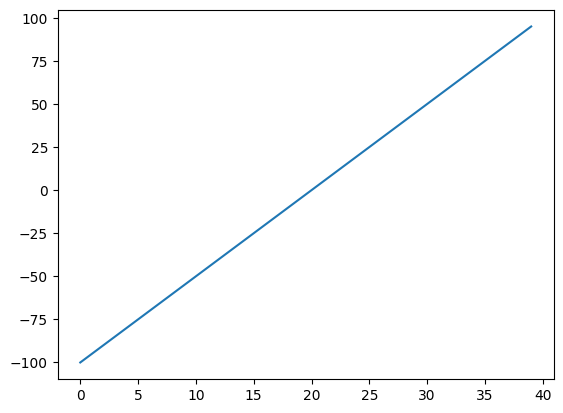

In [63]:
plt.plot(df['x'])

In [64]:
df['x2']=df['x']**2
df['x3']=df['x']**3
df['x4']=df['x']**4



df

,x,x2,x3,x4
0,-100,10000,-1000000,100000000
1,-95,9025,-857375,81450625
2,-90,8100,-729000,65610000
3,-85,7225,-614125,52200625
4,-80,6400,-512000,40960000
5,-75,5625,-421875,31640625
6,-70,4900,-343000,24010000
7,-65,4225,-274625,17850625
8,-60,3600,-216000,12960000
9,-55,3025,-166375,9150625


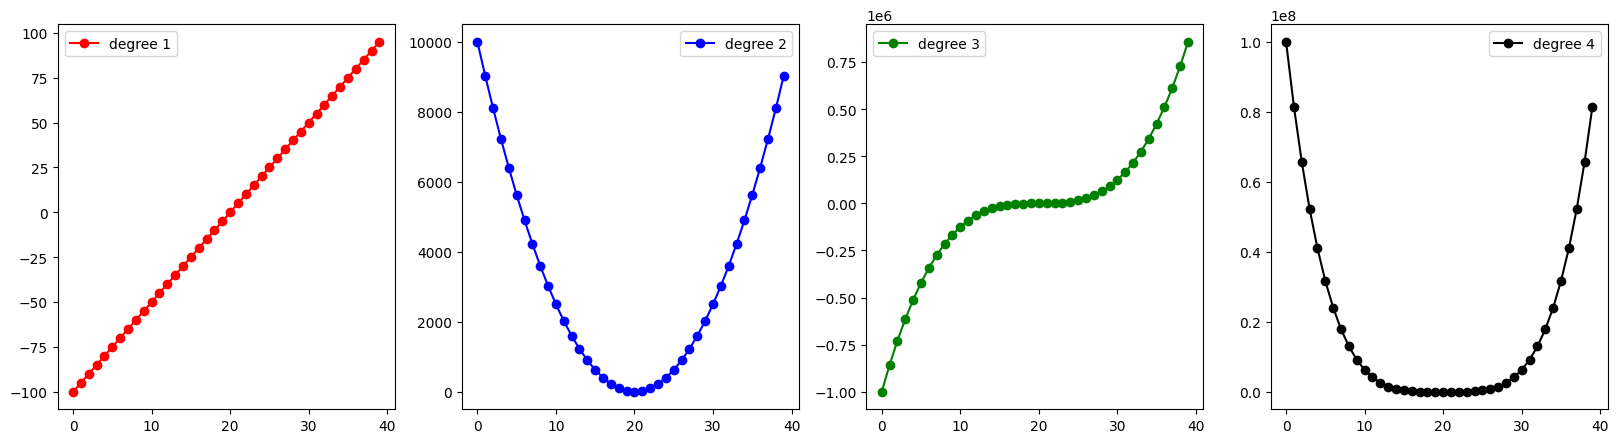

In [65]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4, figsize=(20,5))
ax1.plot(df['x'],color='red',label='degree 1',marker='o')
ax2.plot(df['x2'],color='blue',label='degree 2',marker='o')
ax3.plot(df['x3'],color='green' ,label='degree 3',marker='o')
ax4.plot(df['x4'],color='black',label='degree 4',marker='o')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

In [66]:
df=pd.read_csv('Position_Salaries.csv')
df.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [67]:
df.sample(5)

,Position,Level,Salary
6,Partner,7,200000
9,CEO,10,1000000
2,Senior Consultant,3,60000
3,Manager,4,80000
7,Senior Partner,8,300000


In [68]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


C:\Users\Nisha Yadav\AppData\Local\Temp\ipykernel_6004\3662409505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


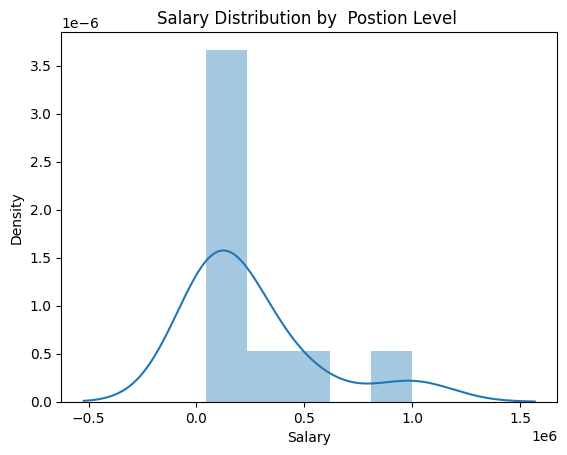

In [69]:
# data distribution 
plt.title("Salary Distribution by  Postion Level ")
sns.distplot(df['Salary'])
plt.show()

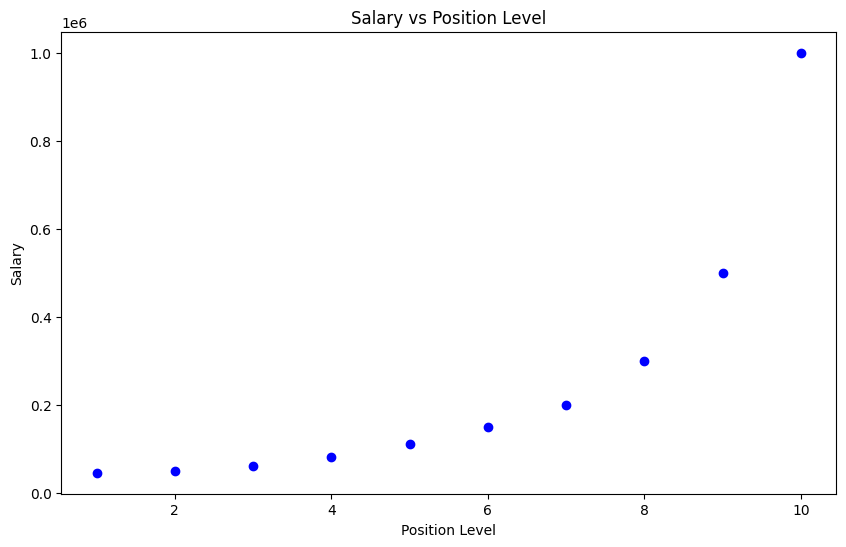

In [70]:
#relationship between Level and salary
plt.figure(figsize=(10,6))
plt.scatter(df['Level'],df['Salary'],color='blue')
plt.title('Salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()



In [71]:
df = pd.read_csv('Position_Salaries.csv')

In [72]:
#spilting between dependent and independent variable
X=df[['Level']]
y=df['Salary']


In [73]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [74]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [75]:
#train the dataset
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [76]:
#polynomial regression
pr=PolynomialFeatures(degree=5)# to mold the data we use degree
X_poly=pr.fit_transform(X)
lr2=LinearRegression()
lr2.fit(X_poly,y)

LinearRegression()

In [77]:
#Predict
y_pred_poly=lr2.predict(X_poly)
print(y_pred_poly)

y_pred_lr=lr.predict(X)
print(y_pred_lr)

[ 43895.10489603  53836.82983718  57065.26806579  77286.71328745
 112263.40326412 152736.59673702 201349.65034962 291571.09557057
 506617.71561662 998377.6223756 ]
[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


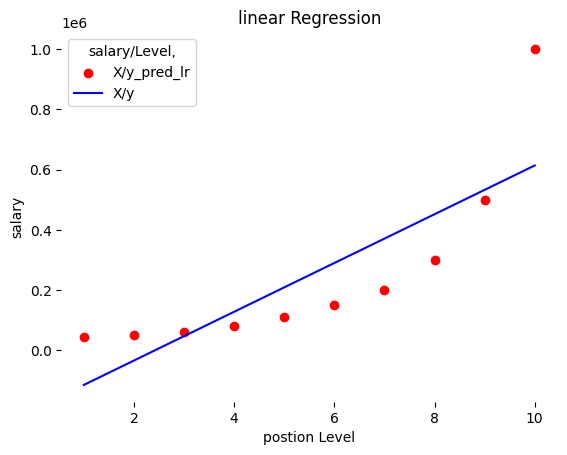

In [78]:
#visualize the linear regression
plt.scatter(X,y,color='red')
plt.plot(X,y_pred_lr,color='blue')
plt.title("linear Regression")
plt.xlabel("postion Level")
plt.ylabel('salary')
plt.legend(['X/y_pred_lr','X/y'],title="salary/Level,",loc='best',facecolor='white')
plt.box(False)
plt.show()

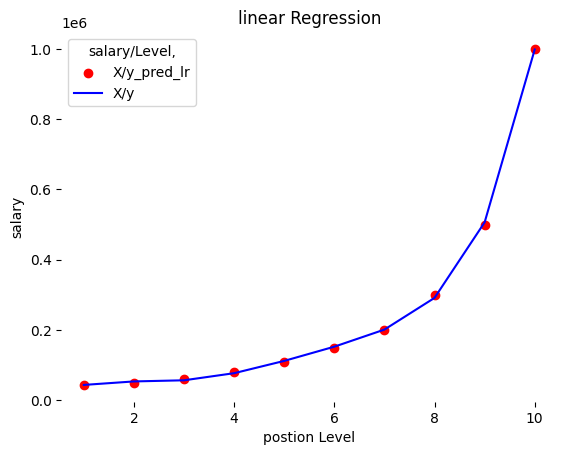

In [79]:
#polynomial regression
plt.scatter(X,y,color='red')
plt.plot(X,y_pred_poly,color='blue')
plt.title("linear Regression")
plt.xlabel("postion Level")
plt.ylabel('salary')
plt.legend(['X/y_pred_lr','X/y'],title="salary/Level,",loc='best',facecolor='white')
plt.box(False)
plt.show()

In [80]:

print(f'Linear reg result:{lr.predict([[6.5]])}')
print(f'Linear reg result:{lr2.predict(pr.fit_transform([[6.5]]))}')

Linear reg result:[330378.78787879]
Linear reg result:[174878.07765173]


c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
